<a href="https://colab.research.google.com/github/adii2512/BML-Practical-s-/blob/main/Experiment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("Iris.csv")
df = df.drop(columns=["Id"])   # Drop ID column
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

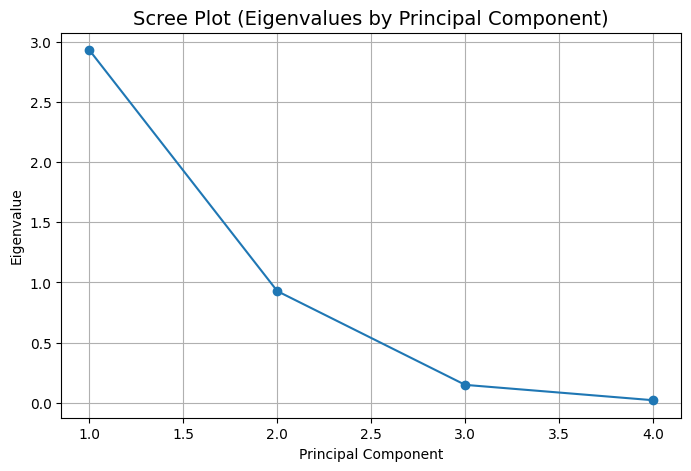

In [7]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_)+1),
         pca.explained_variance_,
         marker='o')
plt.title("Scree Plot (Eigenvalues by Principal Component)", fontsize=14)
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()

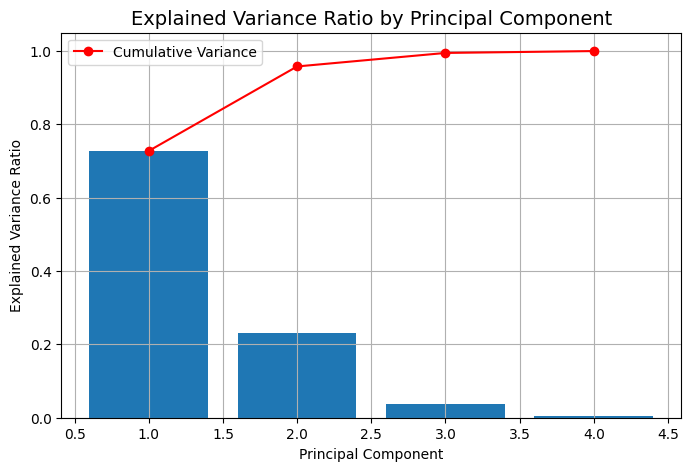

Explained Variance Ratio: [0.72770452 0.23030523 0.03683832 0.00515193]

Cumulative Variance: [0.72770452 0.95800975 0.99484807 1.        ]


In [8]:
plt.figure(figsize=(8,5))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1),
        pca.explained_variance_ratio_)
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         np.cumsum(pca.explained_variance_ratio_),
         marker='o', color='red', label="Cumulative Variance")

plt.title("Explained Variance Ratio by Principal Component", fontsize=14)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.legend()
plt.grid(True)
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("\nCumulative Variance:", np.cumsum(pca.explained_variance_ratio_))

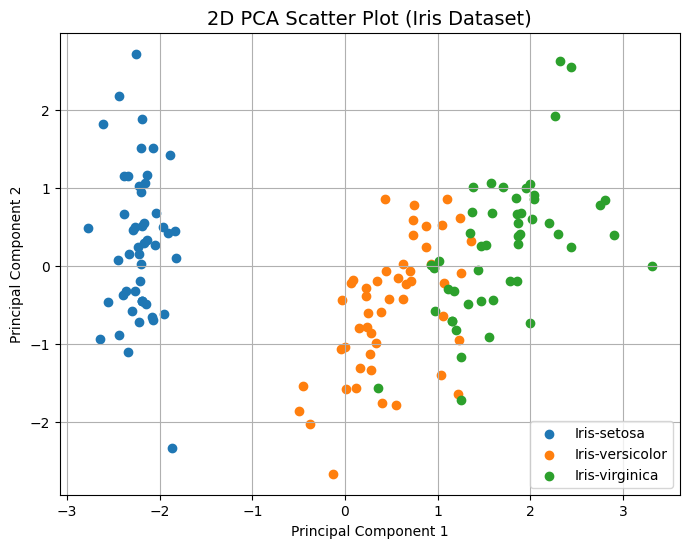

In [9]:
pca_2 = PCA(n_components=2)
X_2d = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))

for species in y.unique():
    plt.scatter(X_2d[y == species, 0],
                X_2d[y == species, 1],
                label=species)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Scatter Plot (Iris Dataset)", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [10]:
pca_df = pd.DataFrame({
    "PC1": X_2d[:, 0],
    "PC2": X_2d[:, 1],
    "Species": y
})

pca_df.head()

,PC1,PC2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
